# Kernel Density Estimator(KDE)

使用高斯核函数估计样本的概率分布:
$$
p(\mathbf{x})=\frac{1}{N} \sum_{n=1}^{N} \frac{1}{\left(2 \pi h^{2}\right)^{1 / 2}} \exp \left\{-\frac{\left\|\mathbf{x}-\mathbf{x}_{n}\right\|^{2}}{2 h^{2}}\right\}
$$

In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
%matplotlib inline 


In [2]:
def gaussian_kernel(x, y, h):
    return 1/(2*np.pi*h*h)**0.5 * np.exp(-((x-y)**2).sum(axis=-1)/2/h/h)

In [3]:
class NaiveKDE():
    def __init__(self, kernel_func=gaussian_kernel, bandwidth=1):
        self.kernel_func = kernel_func
        self.h = bandwidth

    def fit(self, data):
        data = np.asarray(data)
        assert np.ndim(data) <= 2
        if np.ndim(data) == 1:
            data = data[:, None]
        self.data = data[None, :, :]  # 1 X N X K

    def evaluate(self, x):
        x = np.asarray(x)
        if np.ndim(x) == 1:
            x = x[:, None]
        assert x.shape[-1] == self.data.shape[-1]
        if np.ndim(x) <= 1:
            x_num = 1
        else:
            x_num = x.shape[0]

        return ((self.kernel_func(x.reshape(x_num, 1, -1), self.data,
                                  self.h))).mean(axis=-1)  # M X 1 X K


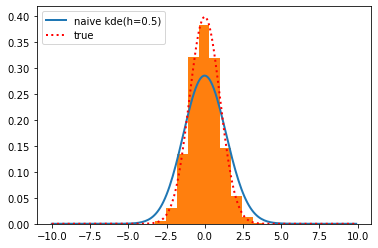

In [5]:
def kde_test():
    np.random.seed(42)
    data = np.random.randn(1000)

    kde = NaiveKDE(gaussian_kernel, bandwidth=1)
    kde.fit(data)
    x = np.arange(-10, 10, step=0.1)
    p = kde.evaluate(x)

    plt.plot(x, p,lw=2, label='naive kde(h=0.5)')
    plt.hist(data, density=True)
    gaussian = multivariate_normal(0, 1)
    plt.plot(x, gaussian.pdf(x), 'r:', lw=2, label='true')
    plt.legend(loc='upper left')
    plt.show()
kde_test()